In [1]:
import pandas as panda
from sklearn.model_selection import train_test_split

#supervised learning using random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from math import sqrt

# Model persistence to avoid training https://scikit-learn.org/stable/model_persistence.html
import sklearn.externals
import joblib

# interactive charts, I prefer this over the static matplotlib chats.
# Really good documentation and very easy to make dashboards or embed the figures elsewhere because it uses js too
import plotly.express as px

import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plot

In [2]:
# preprocess the data

panda.set_option('display.max_columns', None)
panda.set_option('mode.chained_assignment', None)

# read the dataframe
pokemon_dataframe = panda.read_csv('./PokemonArchive/data/cleaned_pokemon_stats.csv', sep = ',')
pokemon_dataframe.head()

,id,name,primary_type,secondary_type,total,hp,attack,defense,special_atk,special_def,speed,generation,legendary,first_pokemon,second_pokemon,winner,total_wins,total_fights,win_percentage,count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,TornadusIncarnate Forme,Virizion,Virizion,37.0,133.0,0.278195,1
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Natu,Litwick,Litwick,46.0,121.0,0.380165,1
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Magcargo,Golett,Golett,89.0,132.0,0.674242,1
3,4,Charmander,Fire,None,309,39,52,43,60,50,65,1,False,Kabuto,Heracross,Kabuto,70.0,125.0,0.560000,1
4,5,Charmeleon,Fire,None,405,58,64,58,80,65,80,1,False,Galvantula,Spritzee,Galvantula,55.0,112.0,0.491071,1


In [3]:
# print colmns names 
list(pokemon_dataframe.columns.values)

['id',
 'name',
 'primary_type',
 'secondary_type',
 'total',
 'hp',
 'attack',
 'defense',
 'special_atk',
 'special_def',
 'speed',
 'generation',
 'legendary',
 'first_pokemon',
 'second_pokemon',
 'winner',
 'total_wins',
 'total_fights',
 'win_percentage',
 'count']

In [4]:
# Delete Nan 
pokemon_dataframe = pokemon_dataframe.dropna(axis=0, how='any')

In [5]:
# X is features, y is win_percentage
# the features include the following ['id','name','primary_type','secondary_type','total','hp','attack','defense','special_atk','special_def','speed','generation']
# index starts from zero
X = pokemon_dataframe.iloc[:, 4:12].values
y = pokemon_dataframe.iloc[:, -2].values

# printing the values here will help get the accurate column to adjust, uncomment the two lines below for the same
# X
# y

In [6]:
X

array([[318,  45,  49, ...,  65,  45,   1],
       [405,  60,  62, ...,  80,  60,   1],
       [525,  80,  82, ..., 100,  80,   1],
       ...,
       [600,  50, 100, ..., 150,  50,   6],
       [600,  80, 110, ..., 130,  70,   6],
       [600,  80, 110, ...,  90,  70,   6]], dtype=int64)

In [7]:
target = pokemon_dataframe['attack']
features = pokemon_dataframe[['defense', 'speed', 'hp']]

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=8)

model_linear = LinearRegression()

model_linear.fit(x_train, y_train)
prediction = model_linear.predict(x_test)

print("Model score / R squared score: {}".format(model_linear.score(x_test, y_test)))

mse = np.sqrt(mean_squared_error(y_test, prediction))
print("Mean squared error: {}".format(mse))

Model score / R squared score: 0.3116920561956361
Mean squared error: 24.81887622621009


Text(0.5,1,'Attack vs Predicted attack:')

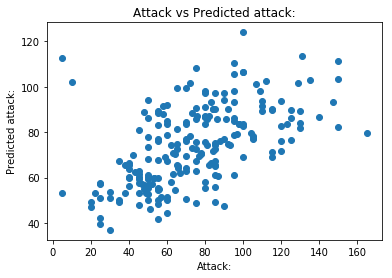

In [8]:
plot.scatter(y_test, prediction)
plot.xlabel("Attack:")
plot.ylabel("Predicted attack:")
plot.title("Attack vs Predicted attack:")

In [14]:
# Filter the dataframe to get rows for Charmander and Bulbasaur
charmander_row = pokemon_dataframe[pokemon_dataframe['name'] == 'Charmander']
bulbasaur_row = pokemon_dataframe[pokemon_dataframe['name'] == 'Bulbasaur']

# Extract the features for Charmander and Bulbasaur
charmander_features = charmander_row[['defense', 'speed', 'hp']]
bulbasaur_features = bulbasaur_row[['defense', 'speed', 'hp']]

# Predict attack stat for Charmander and Bulbasaur
charmander_predicted_attack = model_linear.predict(charmander_features)
bulbasaur_predicted_attack = model_linear.predict(bulbasaur_features)

# Extract the actual attack stat values for Charmander and Bulbasaur
charmander_actual_attack = charmander_row['attack'].values[0]
bulbasaur_actual_attack = bulbasaur_row['attack'].values[0]

print("Predicted attack stat for Charmander:", charmander_predicted_attack[0])
print("Actual attack stat for Charmander:", charmander_actual_attack)

print("\nPredicted attack stat for Bulbasaur:", bulbasaur_predicted_attack[0])
print("Actual attack stat for Bulbasaur:", bulbasaur_actual_attack)


Predicted attack stat for Charmander: 54.000017898962106
Actual attack stat for Charmander: 52

Predicted attack stat for Bulbasaur: 53.349168658913555
Actual attack stat for Bulbasaur: 49


In [15]:
test_data = panda.read_csv('./PokemonArchive/data/tests.csv', sep = ',')
new_test_data = test_data[["First_pokemon","Second_pokemon"]].replace(pokemon_dataframe.name)
new_test_data.head()

,First_pokemon,Second_pokemon
0,Gyarados,Goldeen
1,Fletchling,Scizor
2,Klefki,Horsea
3,Espeon,Mienfoo
4,Sandslash,Frogadier
